In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



# <center>Tugas Minggu 6 Regresi</center>


#### Tentang Notebook
Dari dataset insurance.csv, silakan membuat script dengan merancang regresi berikut :
1. Regresi linier sederhana, bandingkan mse, mae, r2score untuk data masukan kolom age, bmi, dan children
2. Regresi linier variable jamak, bandingkan mse, mae, r2score dengan regresi linier sederhana
3. Regresi non linier SVR dan DTR sederhana bandingkan mse, mae, r2score untuk data masukan kolom age, bmi, dan children, dan bandingkan hasilnya dengan regresi linier
4. Regresi non linier SVR dan DTR variable jamak bandingkan mse, mae, r2score untuk data masukan kolom age, bmi, dan children, dan bandingkan hasilnya dengan regresi linier

### Membaca Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tugas Minggu 6/insurance.csv")

# melihat dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Eksplorasi Data
Eksplorasi deskriptif data yang diunduh.

In [ ]:
# merangkum data
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Beberapa fitur dapat dieksplorasi dengan cara berikut.

In [ ]:
cdf = df[['age','bmi','children','charges']]
cdf.head(10)

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
5,31,25.740,0,3756.62160
6,46,33.440,1,8240.58960
7,37,27.740,3,7281.50560
8,37,29.830,2,6406.41070
9,60,25.840,0,28923.13692


Fitur-fitur tersebut dapat diplot sebagai berikut:

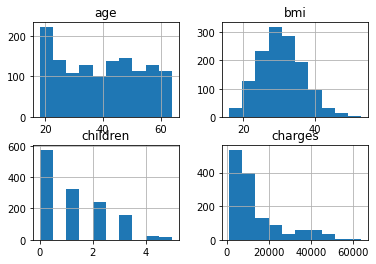

In [ ]:
viz = cdf[['age','bmi','children','charges']]
viz.hist()
plt.show()

Plot fitur-fitur vs emisi dapat dibuat dan dapat dilihat linearitas hubungannya.

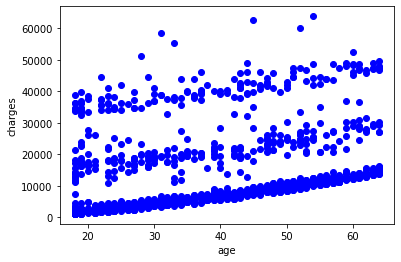

In [ ]:
plt.scatter(cdf.age, cdf.charges,  color='blue')
plt.xlabel("age")
plt.ylabel("charges")
plt.show()


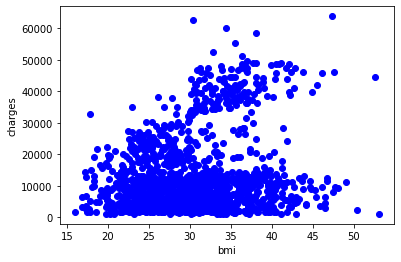

In [ ]:
plt.scatter(cdf.bmi, cdf.charges,  color='blue')
plt.xlabel("bmi")
plt.ylabel("charges")
plt.show()


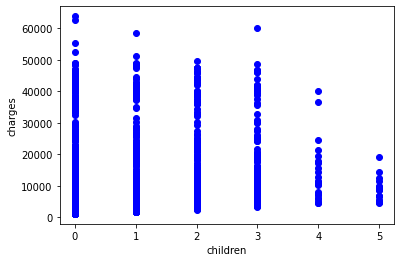

In [ ]:
plt.scatter(cdf.children, cdf.charges,  color='blue')
plt.xlabel("children")
plt.ylabel("charges")
plt.show()



# (1.) Regresi linier sederhana, bandingkan mse, mae, r2score untuk data masukan kolom age, bmi, dan children

### Import packages yang diperlukan

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Pembuatan dataset pelatihan dan pengujian
Pemisahan data latih/uji melibatkan pemisahan dataset menjadi dataset pelatihan dan pengujian, yang saling eksklusif. Setelah itu, dataset pelatihan dapat digunakan untuk membuat model dan dataset pengujian untuk pengujian.
Hal ini akan memberikan evaluasi yang lebih akurat pada akurasi out-of-sample karena dataset pengujian bukan merupakan bagian dari dataset yang telah digunakan untuk melatih data. Ini lebih realistis untuk masalah dunia nyata.

Ini berarti bahwa hasil dari setiap titik data dalam kumpulan data ini diketahui, sehingga sangat bagus untuk data pengujian. Dataset pengujian belum digunakan untuk melatih model, sehingga model tidak memiliki pengetahuan tentang hasil dari data ini, sehingga dapat disebut pengujian di luar sampel.



In [ ]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
len(train)+len(test)
len(train)
len(test)
# len(test)
# train
# test
# df
# msk
# train
# len(df)
train

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
5,31,25.740,0,3756.62160
...,...,...,...,...
1332,52,44.700,3,11411.68500
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350


### Model Regresi Sederhana dari fitur "age"
Regresi Linier cocok dengan model linier dengan koefisien B = (B1, ..., Bn) untuk meminimalkan 'jumlah kuadrat sisa (residu)' antara x bebas dalam kumpulan data, dan y tak bebas dengan pendekatan linier.

#### Distribusi Data Pelatihan 



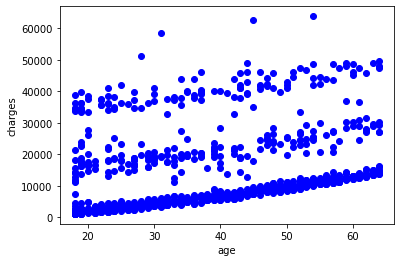

In [ ]:
plt.scatter(train.age, train.charges,  color='blue')
plt.xlabel("age")
plt.ylabel("charges")
plt.show()


#### Pemodelan
Menggunakan sklearn package untuk memodelkan data.

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['age']]) #asanyarray mengambil array indeks dari data train
train_y = np.asanyarray(train[['charges']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)  #teta1
print ('Intercept: ',regr.intercept_) #teta0


Coefficients:  [[246.72940535]]
Intercept:  [3481.54253816]


Seperti disebutkan sebelumnya, __koefisien__ dan __intercept__ dalam regresi linier sederhana, adalah parameter dari garis yang cocok dengan data.
Mengingat bahwa ini adalah regresi linier sederhana, dengan hanya 2 parameter, dan mengetahui bahwa parameternya adalah intercept dan kemiringan atau gradien garis (koefisien), sklearn dapat memperkirakannya langsung dari data.
Perhatikan bahwa semua data harus tersedia untuk menghitung parameter.


#### Plot output model

Plotting garis yang mencocoki terhadap data:

Text(0, 0.5, 'charges')

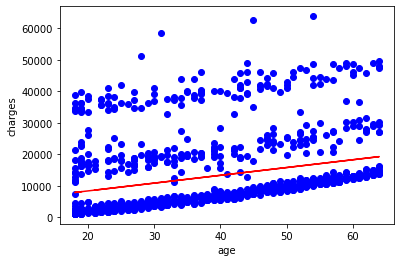

In [ ]:
plt.scatter(train.age, train.charges,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("age")
plt.ylabel("charges")


#### Evaluasi
Nilai aktual dan nilai prediksi dapat dibandingkan untuk menghitung akurasi dari model regresi. Metrik evaluasi sangat penting untuk pengembangan model karena memberikan pengetahuan untuk perbaikan model.

Ada berbagai metrik untuk evaluasi model, misalnya MSE sebagai error untuk mengetahui akurasi dari model yang dibangun yang dihitung dari MSE model terhadap data pengujian: 
    - Mean Absolute Error (MAE): Rerata dari nilai absolut dari error. MAE adalah metrik paling mudah dipahami karena hanya rata-rata dari error.
    - Mean Squared Error (MSE): adalah rerata dari error dikuadratkan. MSE lebih populer dibanding MAE karena fokus pada error yang besar karena dikuadratkan sehingga berdampak lebih besar terhadap error yang lebih besar dibandingkan error yang lebih kecil.
    - Root Mean Squared Error (RMSE).
    - R-squared bukan error namun metrik yang populer yang merepresentasikan sejauh mana data cocok dengan garis regresi yang didapatkan. Semakin besar R-squared akan semaki baik pencocokan garis terhadap data. Nilai terbaik adalah 1.0 dan dapat bernilai negatif.


In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['age']])
test_y = np.asanyarray(test[['charges']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.1f" % r2_score(test_y_ , test_y) )

Mean absolute error: 9232.52
Residual sum of squares (MSE): 146586147.70
R2-score: -11.6


### Model Regresi Sederhana dari fitur "children"
Regresi Linier cocok dengan model linier dengan koefisien B = (B1, ..., Bn) untuk meminimalkan 'jumlah kuadrat sisa (residu)' antara x bebas dalam kumpulan data, dan y tak bebas dengan pendekatan linier.

#### Distribusi Data Pelatihan 



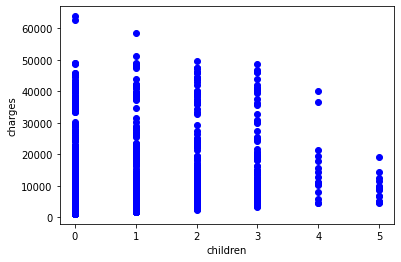

In [ ]:
plt.scatter(train.children, train.charges,  color='blue')
plt.xlabel("children")
plt.ylabel("charges")
plt.show()


#### Pemodelan
Menggunakan sklearn package untuk memodelkan data.

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['children']]) #asanyarray mengambil array indeks dari data train
train_y = np.asanyarray(train[['charges']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)  #teta1
print ('Intercept: ',regr.intercept_) #teta0


Coefficients:  [[912.51157445]]
Intercept:  [12084.84138033]


Seperti disebutkan sebelumnya, __koefisien__ dan __intercept__ dalam regresi linier sederhana, adalah parameter dari garis yang cocok dengan data.
Mengingat bahwa ini adalah regresi linier sederhana, dengan hanya 2 parameter, dan mengetahui bahwa parameternya adalah intercept dan kemiringan atau gradien garis (koefisien), sklearn dapat memperkirakannya langsung dari data.
Perhatikan bahwa semua data harus tersedia untuk menghitung parameter.


#### Plot output model

Plotting garis yang mencocoki terhadap data:

Text(0, 0.5, 'charges')

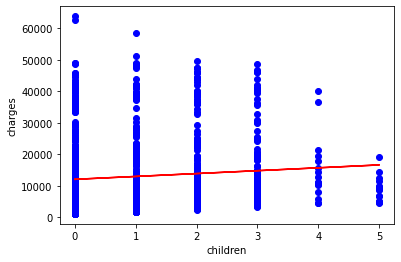

In [ ]:
plt.scatter(train.children, train.charges,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("children")
plt.ylabel("charges")


#### Evaluasi
Nilai aktual dan nilai prediksi dapat dibandingkan untuk menghitung akurasi dari model regresi. Metrik evaluasi sangat penting untuk pengembangan model karena memberikan pengetahuan untuk perbaikan model.

Ada berbagai metrik untuk evaluasi model, misalnya MSE sebagai error untuk mengetahui akurasi dari model yang dibangun yang dihitung dari MSE model terhadap data pengujian: 
    - Mean Absolute Error (MAE): Rerata dari nilai absolut dari error. MAE adalah metrik paling mudah dipahami karena hanya rata-rata dari error.
    - Mean Squared Error (MSE): adalah rerata dari error dikuadratkan. MSE lebih populer dibanding MAE karena fokus pada error yang besar karena dikuadratkan sehingga berdampak lebih besar terhadap error yang lebih besar dibandingkan error yang lebih kecil.
    - Root Mean Squared Error (RMSE).
    - R-squared bukan error namun metrik yang populer yang merepresentasikan sejauh mana data cocok dengan garis regresi yang didapatkan. Semakin besar R-squared akan semaki baik pencocokan garis terhadap data. Nilai terbaik adalah 1.0 dan dapat bernilai negatif.


In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['children']])
test_y = np.asanyarray(test[['charges']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.1f" % r2_score(test_y_ , test_y) )

Mean absolute error: 9433.34
Residual sum of squares (MSE): 165226360.62
R2-score: -126.9


### Model Regresi Sederhana dari fitur "bmi"
Regresi Linier cocok dengan model linier dengan koefisien B = (B1, ..., Bn) untuk meminimalkan 'jumlah kuadrat sisa (residu)' antara x bebas dalam kumpulan data, dan y tak bebas dengan pendekatan linier.

#### Distribusi Data Pelatihan 



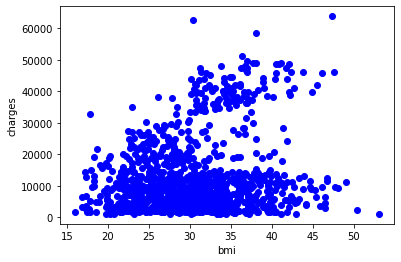

In [ ]:
plt.scatter(train.bmi, train.charges,  color='blue')
plt.xlabel("bmi")
plt.ylabel("charges")
plt.show()


#### Pemodelan
Menggunakan sklearn package untuk memodelkan data.

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['bmi']]) #asanyarray mengambil array indeks dari data train
train_y = np.asanyarray(train[['charges']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)  #teta1
print ('Intercept: ',regr.intercept_) #teta0


Coefficients:  [[375.34437225]]
Intercept:  [1555.52113614]


Seperti disebutkan sebelumnya, __koefisien__ dan __intercept__ dalam regresi linier sederhana, adalah parameter dari garis yang cocok dengan data.
Mengingat bahwa ini adalah regresi linier sederhana, dengan hanya 2 parameter, dan mengetahui bahwa parameternya adalah intercept dan kemiringan atau gradien garis (koefisien), sklearn dapat memperkirakannya langsung dari data.
Perhatikan bahwa semua data harus tersedia untuk menghitung parameter.


#### Plot output model

Plotting garis yang mencocoki terhadap data:

Text(0, 0.5, 'charges')

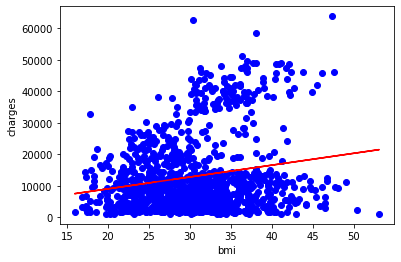

In [ ]:
plt.scatter(train.bmi, train.charges,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("bmi")
plt.ylabel("charges")


#### Evaluasi
Nilai aktual dan nilai prediksi dapat dibandingkan untuk menghitung akurasi dari model regresi. Metrik evaluasi sangat penting untuk pengembangan model karena memberikan pengetahuan untuk perbaikan model.

Ada berbagai metrik untuk evaluasi model, misalnya MSE sebagai error untuk mengetahui akurasi dari model yang dibangun yang dihitung dari MSE model terhadap data pengujian: 
    - Mean Absolute Error (MAE): Rerata dari nilai absolut dari error. MAE adalah metrik paling mudah dipahami karena hanya rata-rata dari error.
    - Mean Squared Error (MSE): adalah rerata dari error dikuadratkan. MSE lebih populer dibanding MAE karena fokus pada error yang besar karena dikuadratkan sehingga berdampak lebih besar terhadap error yang lebih besar dibandingkan error yang lebih kecil.
    - Root Mean Squared Error (RMSE).
    - R-squared bukan error namun metrik yang populer yang merepresentasikan sejauh mana data cocok dengan garis regresi yang didapatkan. Semakin besar R-squared akan semaki baik pencocokan garis terhadap data. Nilai terbaik adalah 1.0 dan dapat bernilai negatif.


In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['bmi']])
test_y = np.asanyarray(test[['charges']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.1f" % r2_score(test_y_ , test_y) )

Mean absolute error: 9351.48
Residual sum of squares (MSE): 156571871.56
R2-score: -33.0



# (2.) Regresi linier variable jamak, bandingkan mse, mae, r2score dengan regresi linier sederhana

### Import packages yang diperlukan

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

#### Pembuatan dataset pelatihan dan pengujian
Pemisahan data latih/uji melibatkan pemisahan dataset menjadi dataset pelatihan dan pengujian, yang saling eksklusif. Setelah itu, dataset pelatihan dapat digunakan untuk membuat model dan dataset pengujian untuk pengujian.
Hal ini akan memberikan evaluasi yang lebih akurat pada akurasi out-of-sample karena dataset pengujian bukan merupakan bagian dari dataset yang telah digunakan untuk melatih data. Ini lebih realistis untuk masalah dunia nyata.

Ini berarti bahwa hasil dari setiap titik data dalam kumpulan data ini diketahui, sehingga sangat bagus untuk data pengujian. Dataset pengujian belum digunakan untuk melatih model, sehingga model tidak memiliki pengetahuan tentang hasil dari data ini, sehingga dapat disebut pengujian di luar sampel.



In [ ]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Model Regresi Variabel Jamak
Regresi Linier cocok dengan model linier dengan koefisien B = (B1, ..., Bn) untuk meminimalkan 'jumlah kuadrat sisa (residu)' antara x bebas (X1, ..., Xn) dalam kumpulan data, dan y tak bebas dengan pendekatan linier.

#### Pemodelan
Menggunakan sklearn package untuk memodelkan data.

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['age','bmi','children']])
train_y = np.asanyarray(train[['charges']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)


Coefficients:  [[235.78991517 383.63734667 576.69527339]]
Intercept:  [-8203.87276393]


Seperti disebutkan sebelumnya, __koefisien__ dan __intercept__ dalam regresi linier sederhana, adalah parameter dari garis yang cocok dengan data.
Perhatikan bahwa semua data harus tersedia untuk menghitung parameter.


#### Evaluasi
Nilai aktual dan nilai prediksi dapat dibandingkan untuk menghitung akurasi dari model regresi. Metrik evaluasi sangat penting untuk pengembangan model karena memberikan pengetahuan untuk perbaikan model.

Ada berbagai metrik untuk evaluasi model, misalnya MSE sebagai error untuk mengetahui akurasi dari model yang dibangun yang dihitung dari MSE model terhadap data pengujian: 
    - Mean Absolute Error (MAE): Rerata dari nilai absolut dari error. MAE adalah metrik paling mudah dipahami karena hanya rata-rata dari error.
    - Mean Squared Error (MSE): adalah rerata dari error dikuadratkan. MSE lebih populer dibanding MAE karena fokus pada error yang besar karena dikuadratkan sehingga berdampak lebih besar terhadap error yang lebih besar dibandingkan error yang lebih kecil.
    - Root Mean Squared Error (RMSE).
    - R-squared bukan error namun metrik yang populer yang merepresentasikan sejauh mana data cocok dengan garis regresi yang didapatkan. Semakin besar R-squared akan semaki baik pencocokan garis terhadap data. Nilai terbaik adalah 1.0 dan dapat bernilai negatif.


In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['age','bmi','children']])
test_y = np.asanyarray(test[['charges']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 9141.35
Residual sum of squares (MSE): 123906273.24
R2-score: -4.79



# (3.) Regresi non linier SVR dan DTR sederhana bandingkan mse, mae, r2score untuk data masukan kolom age, bmi, dan children, dan bandingkan hasilnya dengan regresi linier

## Regresi non linier SVR Sederhana

Mengimpor libraries yang diperlukan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

#### Pembuatan dataset pelatihan dan pengujian (dengan 'age' sebagai variabel independen)
Pemisahan data latih/uji melibatkan pemisahan dataset menjadi dataset pelatihan dan pengujian, yang saling eksklusif. Setelah itu, dataset pelatihan dapat digunakan untuk membuat model dan dataset pengujian untuk pengujian.
Hal ini akan memberikan evaluasi yang lebih akurat pada akurasi out-of-sample karena dataset pengujian bukan merupakan bagian dari dataset yang telah digunakan untuk melatih data. Ini lebih realistis untuk masalah dunia nyata.

Ini berarti bahwa hasil dari setiap titik data dalam kumpulan data ini diketahui, sehingga sangat bagus untuk data pengujian. Dataset pengujian belum digunakan untuk melatih model, sehingga model tidak memiliki pengetahuan tentang hasil dari data ini, sehingga dapat disebut pengujian di luar sampel.



In [ ]:
# Mengambil "age" sebagai variabel independen (regressor)
X = cdf.iloc[:, 0].values
# Mengambil "charges" sebagai variabel dependen
y = cdf.iloc[:, 3].values
# Reshape data karena hanya menggunakan satu fitur "age"
X = X.reshape(-1,1)
# Reshape data karena hanya satu fitur
y = y.reshape(-1,1)

Proses splitting dataset pelatihan dan pengujian

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Normalisasi atau scaling dataset

In [ ]:
# Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# sc_y = StandardScaler()
# X = sc_X.fit_transform(X_train)
# y = sc_y.fit_transform(y_train)

Pembuatan Model

In [ ]:
##################Pelatihan
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
#linear = Linear Kernel
regressor.fit(X_train, y_train)

##################Pengujian
from sklearn.metrics import r2_score
test_y_ = regressor.predict(X_test)

test_y=y_test;

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )



Mean absolute error: 9546.26
Residual sum of squares (MSE): 210363636.12
R2-score: -11.75


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Pembuatan dataset pelatihan dan pengujian (dengan 'bmi' sebagai variabel independen)
Pemisahan data latih/uji melibatkan pemisahan dataset menjadi dataset pelatihan dan pengujian, yang saling eksklusif. Setelah itu, dataset pelatihan dapat digunakan untuk membuat model dan dataset pengujian untuk pengujian.
Hal ini akan memberikan evaluasi yang lebih akurat pada akurasi out-of-sample karena dataset pengujian bukan merupakan bagian dari dataset yang telah digunakan untuk melatih data. Ini lebih realistis untuk masalah dunia nyata.

Ini berarti bahwa hasil dari setiap titik data dalam kumpulan data ini diketahui, sehingga sangat bagus untuk data pengujian. Dataset pengujian belum digunakan untuk melatih model, sehingga model tidak memiliki pengetahuan tentang hasil dari data ini, sehingga dapat disebut pengujian di luar sampel.



In [ ]:
# Mengambil "bmi" sebagai variabel independen (regressor)
X = cdf.iloc[:, 1].values
# Mengambil "charges" sebagai variabel dependen
y = cdf.iloc[:, 3].values
# Reshape data karena hanya menggunakan satu fitur "bmi"
X = X.reshape(-1,1)
# Reshape data karena hanya satu fitur
y = y.reshape(-1,1)

Proses splitting dataset pelatihan dan pengujian

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Normalisasi atau scaling dataset

In [ ]:
# Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# sc_y = StandardScaler()
# X = sc_X.fit_transform(X_train)
# y = sc_y.fit_transform(y_train)

Pembuatan Model

In [ ]:
##################Pelatihan
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
#linear = Linear Kernel
regressor.fit(X_train, y_train)

##################Pengujian
from sklearn.metrics import r2_score
test_y_ = regressor.predict(X_test)

test_y=y_test;

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )



Mean absolute error: 8629.53
Residual sum of squares (MSE): 176498312.38
R2-score: -639.77


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Pembuatan dataset pelatihan dan pengujian (dengan 'childern' sebagai variabel independen)
Pemisahan data latih/uji melibatkan pemisahan dataset menjadi dataset pelatihan dan pengujian, yang saling eksklusif. Setelah itu, dataset pelatihan dapat digunakan untuk membuat model dan dataset pengujian untuk pengujian.
Hal ini akan memberikan evaluasi yang lebih akurat pada akurasi out-of-sample karena dataset pengujian bukan merupakan bagian dari dataset yang telah digunakan untuk melatih data. Ini lebih realistis untuk masalah dunia nyata.

Ini berarti bahwa hasil dari setiap titik data dalam kumpulan data ini diketahui, sehingga sangat bagus untuk data pengujian. Dataset pengujian belum digunakan untuk melatih model, sehingga model tidak memiliki pengetahuan tentang hasil dari data ini, sehingga dapat disebut pengujian di luar sampel.



In [ ]:
# Mengambil "childern" sebagai variabel independen (regressor)
X = cdf.iloc[:, 2].values
# Mengambil "charges" sebagai variabel dependen
y = cdf.iloc[:, 3].values
# Reshape data karena hanya menggunakan satu fitur "childern"
X = X.reshape(-1,1)
# Reshape data karena hanya satu fitur
y = y.reshape(-1,1)

Proses splitting dataset pelatihan dan pengujian

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Normalisasi atau scaling dataset

In [ ]:
# Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# sc_y = StandardScaler()
# X = sc_X.fit_transform(X_train)
# y = sc_y.fit_transform(y_train)

Pembuatan Model

In [ ]:
##################Pelatihan
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
#linear = Linear Kernel
regressor.fit(X_train, y_train)

##################Pengujian
from sklearn.metrics import r2_score
test_y_ = regressor.predict(X_test)

test_y=y_test;

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )


Mean absolute error: 8615.69
Residual sum of squares (MSE): 176119642.36
R2-score: -67994.43


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Regresi non linier DTR Sederhana

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

##### Pembuatan dataset pelatihan dan pengujian (dengan 'age' sebagai variabel independen)
Pemisahan data latih/uji melibatkan pemisahan dataset menjadi dataset pelatihan dan pengujian, yang saling eksklusif. Setelah itu, dataset pelatihan dapat digunakan untuk membuat model dan dataset pengujian untuk pengujian.
Hal ini akan memberikan evaluasi yang lebih akurat pada akurasi out-of-sample karena dataset pengujian bukan merupakan bagian dari dataset yang telah digunakan untuk melatih data. Ini lebih realistis untuk masalah dunia nyata.

Ini berarti bahwa hasil dari setiap titik data dalam kumpulan data ini diketahui, sehingga sangat bagus untuk data pengujian. Dataset pengujian belum digunakan untuk melatih model, sehingga model tidak memiliki pengetahuan tentang hasil dari data ini, sehingga dapat disebut pengujian di luar sampel.



In [ ]:
# Mengambil "age" sebagai variabel independen (regressor)
X = cdf.iloc[:, 0].values
# Mengambil "charges" sebagai variabel dependen
y = cdf.iloc[:, 3].values
# Reshape data karena hanya menggunakan satu fitur "age"
X = X.reshape(-1,1)
# Reshape data karena hanya satu fitur
y = y.reshape(-1,1)

Proses splitting dataset pelatihan dan pengujian

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Normalisasi atau scaling dataset

In [ ]:
# Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# sc_y = StandardScaler()
# X = sc_X.fit_transform(X)
# y = sc_y.fit_transform(y)

Pembuatan Model

In [ ]:
# Fitting Decision Tree Regression to the dataset
# Pelatihan
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)


#Pengujian

from sklearn.metrics import r2_score

test_y_ = regressor.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - y_test) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , y_test) )


Mean absolute error: 9986.06
Residual sum of squares (MSE): 177035546.51
R2-score: -6.99


#### Pembuatan dataset pelatihan dan pengujian (dengan 'bmi' sebagai variabel independen)
Pemisahan data latih/uji melibatkan pemisahan dataset menjadi dataset pelatihan dan pengujian, yang saling eksklusif. Setelah itu, dataset pelatihan dapat digunakan untuk membuat model dan dataset pengujian untuk pengujian.
Hal ini akan memberikan evaluasi yang lebih akurat pada akurasi out-of-sample karena dataset pengujian bukan merupakan bagian dari dataset yang telah digunakan untuk melatih data. Ini lebih realistis untuk masalah dunia nyata.

Ini berarti bahwa hasil dari setiap titik data dalam kumpulan data ini diketahui, sehingga sangat bagus untuk data pengujian. Dataset pengujian belum digunakan untuk melatih model, sehingga model tidak memiliki pengetahuan tentang hasil dari data ini, sehingga dapat disebut pengujian di luar sampel.



In [ ]:
# Mengambil "bmi" sebagai variabel independen (regressor)
X = cdf.iloc[:, 1].values
# Mengambil "charges" sebagai variabel dependen
y = cdf.iloc[:, 3].values
# Reshape data karena hanya menggunakan satu fitur "bmi"
X = X.reshape(-1,1)
# Reshape data karena hanya satu fitur
y = y.reshape(-1,1)

Proses splitting dataset pelatihan dan pengujian

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Normalisasi atau scaling dataset

In [ ]:
# Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# sc_y = StandardScaler()
# X = sc_X.fit_transform(X)
# y = sc_y.fit_transform(y)

Pembuatan Model

In [ ]:
# Fitting Decision Tree Regression to the dataset
# Pelatihan
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)


#Pengujian

from sklearn.metrics import r2_score

test_y_ = regressor.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - y_test) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , y_test) )


Mean absolute error: 11195.26
Residual sum of squares (MSE): 241683700.09
R2-score: -2.03


#### Pembuatan dataset pelatihan dan pengujian (dengan 'childern' sebagai variabel independen)
Pemisahan data latih/uji melibatkan pemisahan dataset menjadi dataset pelatihan dan pengujian, yang saling eksklusif. Setelah itu, dataset pelatihan dapat digunakan untuk membuat model dan dataset pengujian untuk pengujian.
Hal ini akan memberikan evaluasi yang lebih akurat pada akurasi out-of-sample karena dataset pengujian bukan merupakan bagian dari dataset yang telah digunakan untuk melatih data. Ini lebih realistis untuk masalah dunia nyata.

Ini berarti bahwa hasil dari setiap titik data dalam kumpulan data ini diketahui, sehingga sangat bagus untuk data pengujian. Dataset pengujian belum digunakan untuk melatih model, sehingga model tidak memiliki pengetahuan tentang hasil dari data ini, sehingga dapat disebut pengujian di luar sampel.



In [ ]:
# Mengambil "childern" sebagai variabel independen (regressor)
X = cdf.iloc[:, 0].values
# Mengambil "charges" sebagai variabel dependen
y = cdf.iloc[:, 3].values
# Reshape data karena hanya menggunakan satu fitur "childern"
X = X.reshape(-1,1)
# Reshape data karena hanya satu fitur
y = y.reshape(-1,1)

Proses splitting dataset pelatihan dan pengujian

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Normalisasi atau scaling dataset

In [ ]:
# Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# sc_y = StandardScaler()
# X = sc_X.fit_transform(X)
# y = sc_y.fit_transform(y)

Pembuatan Model

In [ ]:
# Fitting Decision Tree Regression to the dataset
# Pelatihan
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)


#Pengujian

from sklearn.metrics import r2_score

test_y_ = regressor.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - y_test) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , y_test) )


Mean absolute error: 9986.06
Residual sum of squares (MSE): 177035546.51
R2-score: -6.99



# (4.) Regresi non linier SVR dan DTR variable jamak bandingkan mse, mae, r2score untuk data masukan kolom age, bmi, dan children, dan bandingkan hasilnya dengan regresi linier

## Regresi non linier SVR Jamak

##### Pembuatan dataset pelatihan dan pengujian Variabel Jamak

In [ ]:
# Mengambil "age, bmi, childern" sebagai variabel independen (regressor)
X = cdf.iloc[:, 0:3].values
# Mengambil "charges" sebagai variabel dependen
y = cdf.iloc[:, 3].values
# Reshape data karena hanya menggunakan satu fitur "Engine Size"
# X = X.reshape(-1,1)
# Reshape data karena hanya satu fitur
y = y.reshape(-1,1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##################Pelatihan
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
#linear = Linear Kernel
regressor.fit(X_train, y_train)

##################Pengujian
from sklearn.metrics import r2_score
test_y_ = regressor.predict(X_test)

test_y=y_test;

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )




Mean absolute error: 9535.53
Residual sum of squares (MSE): 209730650.34
R2-score: -11.80


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Regresi non linier DTR Jamak

##### Pembuatan dataset pelatihan dan pengujian Variabel Jamak

In [ ]:
# Mengambil "age, bmi, childern" sebagai variabel independen (regressor)
X = cdf.iloc[:, 0:3].values
# Mengambil "Emission" sebagai variabel dependen
y = cdf.iloc[:, 3].values
# Reshape data karena hanya menggunakan satu fitur "age, bmi, childern"
# X = X.reshape(-1,1) #karena X sudah menjadi matriks kolom (3 kolom)
# Reshape data karena hanya satu fitur
y = y.reshape(-1,1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


# Fitting Decision Tree Regression to the dataset
# Pelatihan
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)


#Pengujian
from sklearn.metrics import r2_score
test_y_ = regressor.predict(X_test)

#Perhitungan Akurasi
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - y_test) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , y_test) )


Mean absolute error: 13115.86
Residual sum of squares (MSE): 330964464.38
R2-score: -0.36
